In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

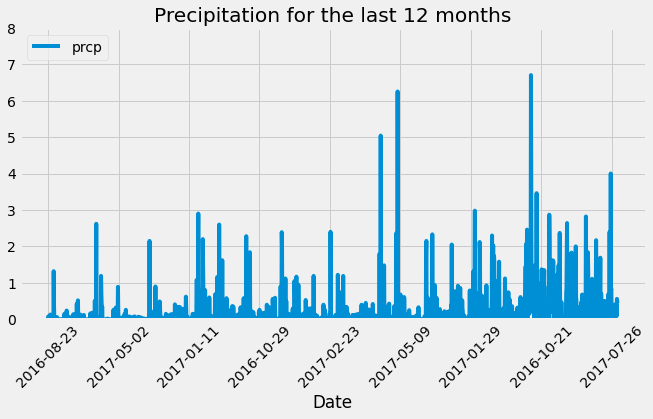

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
session.query(measurements.date).order_by(measurements.date.desc()).first()
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
# print("Last year", last_year)

# Perform a query to retrieve the data and precipitation scores
prcp_df = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(prcp_df, columns=["date","prcp"]).dropna()
prcp_data_df = precipitation_df.set_index('date')

# Sort the dataframe by date
prcp_data_df.sort_values(by='date')
# prcp_data_df = precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(figsize=(10,5),ylim=(0,8))
plt.xlabel('Date')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title('Precipitation for the last 12 months')
# plt.savefig("Precipitation_Analysis.jpg")
plt.legend(loc="upper left")
plt.show()